# Boston Housing Price Dataset
Find more information here : https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

<p><b>Status: <span style=color:orange;>In progress</span></b></p>

##### LOAD THE DATA
Build the dataset from the dataset file

In [1]:
import pandas as pd
import numpy as np

# like in math, these will be the 'X' variables
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
            'RM', 'AGE', 'DIS', 'RAD', 'TAX',
            'PTRATIO', 'B', 'LSTAT']

# this will be 'Y', or the dependent variable
target = 'MEDV'

# List all columns
columns = features + [target]

# read dataset and make a table
data = pd.read_csv('../../data/housing.data', names=columns, sep='\s+', header=None)
data.head()     # preview the first 5 rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


##### SEPARATE DATASET

In [2]:
# separate feature and target values
X = data.loc[:, features]
y = data.loc[:, target].copy()

print ('Data Shape:\nX: {}\nY: {}'.format(X.shape, y.shape))

X.head()  # preview feature data

Data Shape:
X: (506, 13)
Y: (506,)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


## -- DATA BEFORE BEING PREPROCESSED --

##### SHOW STAT INFORMATION

In [3]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##### VISUALIZE FEATURES VS TARGET

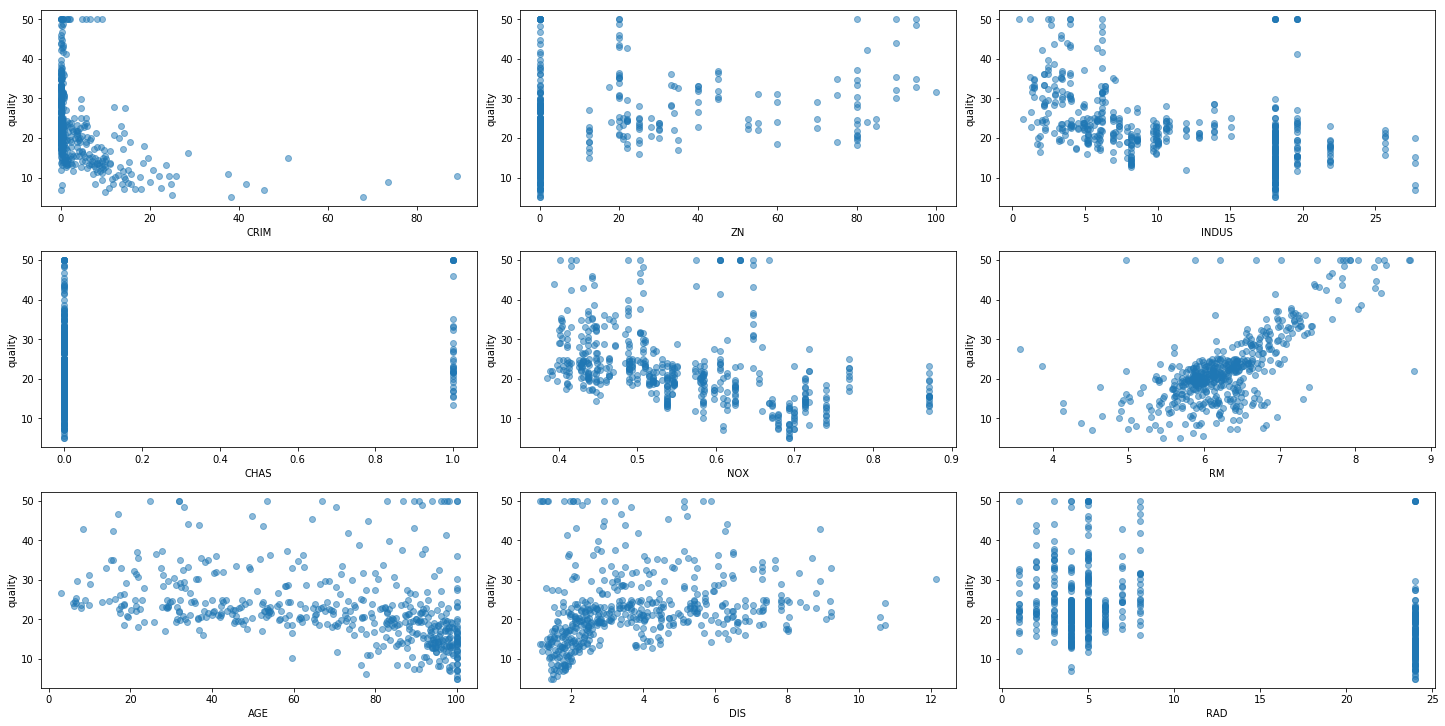

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot with various axes scales
rows = 3 ; cols = 3
f, ax = plt.subplots(rows, cols, figsize=(20,10))

for _row in range(rows):
    for _col in range(cols):
        col_name = X.columns[(_row*cols) + _col]
        ax[_row, _col].scatter(X[col_name], y, alpha=0.5)
        ax[_row, _col].set_xlabel(col_name)
        ax[_row, _col].set_ylabel('quality')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0);

## -- DATA AFTER BEING PREPROCESSED --

##### PREPROCESS THE DATA

In [5]:
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

# apply standarization to the feature values
scaler = StandardScaler()
scaler = scaler.fit(X)
X[:] = scaler.transform(X)

'''
scaler = MinMaxScaler(feature_range=(0, ))
scaler = m_scaler.fit(X)
X[:] = m_scaler.transform(X)

scaler = Normalizer(feature_range=(0, ))
scaler = m_scaler.fit(X)
X[:] = m_scaler.transform(X)

'''
X.describe()

C:\Users\gerardo_paniagua\.conda\envs\vision\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\gerardo_paniagua\.conda\envs\vision\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02
mean,-1.123388e-16,7.898820e-17,2.106352e-16,-3.510587e-17,-1.965929e-16,-1.088282e-16,-1.474446e-16,-8.425408e-17,-1.123388e-16,0.000000,-4.212704e-16,-7.442444e-16,-3.089316e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-0.767576,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-0.464673,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194,1.638828e+00,4.410519e-01,3.548771e+00


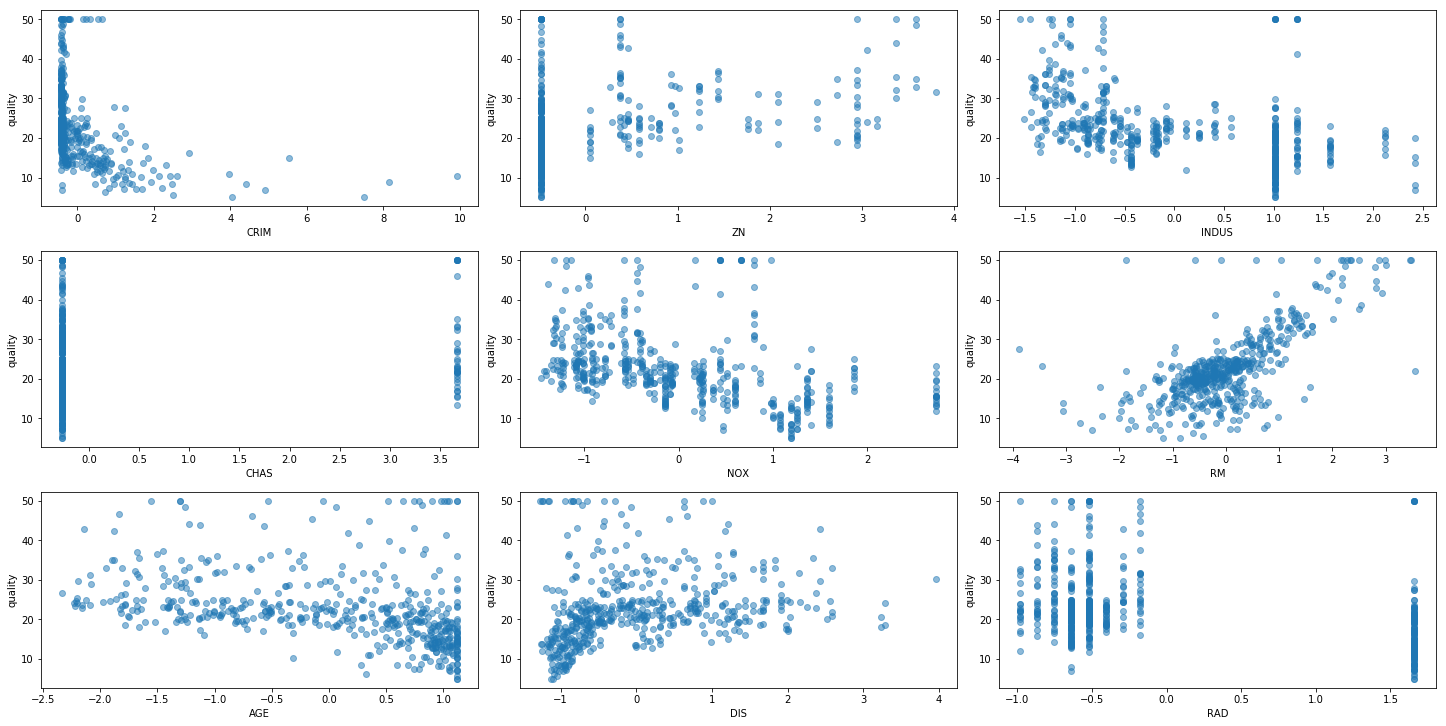

In [6]:
# plot with various axes scales
rows = 3 ; cols = 3
f, ax = plt.subplots(rows, cols, figsize=(20,10))

for _row in range(rows):
    for _col in range(cols):
        col_name = X.columns[(_row*cols) + _col]
        ax[_row, _col].scatter(X[col_name], y, alpha=0.5)
        ax[_row, _col].set_xlabel(col_name)
        ax[_row, _col].set_ylabel('quality')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0);

## -- DATA AFTER BEING PREPROCESSED --

##### OUTPUT PREPROCESSED DATASET
This will output the preprocessed feature and target data into CSV files.

In [7]:
X.to_csv('../../data/preprocessed_data/X.csv', index=False)
y.to_csv('../../data/preprocessed_data/y.csv', index=False)

print('Preprocessed files created succesfully!')

Preprocessed files created succesfully!


##### OUTPUT SCALER TO PREPROCESS DATA

In [8]:
import pickle

saver = open('../../data/preprocessed_data/scaler.pckl', 'wb')
pickle.dump(scaler, saver)
saver.close()

print('Scaler was saved succesfully! please check "data/preprocessed_data" folder')

Scaler was saved succesfully! please check "data/preprocessed_data" folder


##### VERIFY LOADED SCALER

In [9]:
loader = open('../../data/preprocessed_data/scaler.pckl', 'rb')
scaler_pickle = pickle.load(loader)
loader.close()

print(scaler_pickle)   # to verify

StandardScaler(copy=True, with_mean=True, with_std=True)
